<a href="https://colab.research.google.com/github/geoffrey-lawhorn/Portfolio/blob/main/ExtraaLearn_Prediction_Project_Lawhorn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [3]:
extraLearn_path = '/content/drive/MyDrive/MIT Course/Classification and Hypothesis Testing/Project/ExtraaLearn.csv'
df = pd.read_csv(extraLearn_path)

In [4]:
df.head(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.682,Phone Activity,No,No,No,Yes,No,0
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.985,Email Activity,No,No,No,No,No,0
8,EXT009,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
9,EXT010,59,Professional,Mobile App,High,1,1819,3.513,Phone Activity,No,No,No,No,No,0


## Data Overview

- Observations
- Sanity checks

In [5]:
# Looking to get basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
# see that that dataset is 4.6k observations with 15 columns
df.shape

(4612, 15)

In [7]:
# there are no columns with 1 unique value so we do not have to remove anything from this dataset off the bat
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observations**
*   No null values in the dataset
*   4,612 observations with 15 columns (1 being the dependent variable "status")
*   ID is a unique identifier for each observation. We can drop this value.
*   No observations with 1 unique value
*   Left with 14 total columns (13 potential predictors, 1 label)

**We are going to drop the 'ID' variable, and now divide out the variables between numeric and categorical to prepare for EDA.**

In [8]:
df=df.drop(['ID'], axis=1)
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
cat_cols = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Given that there are no null values in the dataset, there is no need to treat missing values.

For feature engineering, we will look to turn categorical variables into dummy variables where needed.

Using EDA methods, will check for outliers.

Scale data for modeling.

In [9]:
# check the numerical columns first
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


Observations:
*   Average age of the lead is 46 years of age, with a minimum of 18 and maximum of 63, showing that the distribution is slightly skewed
*   Website visits is an average of 3.5, however it comes with some outliers, with some leads visiting up to 30 times
*   Website_visits, time_spent_on_website, and page_views_per_visit are likely correlated to some degree and all show some level of skewness in their summary details.
*   One additional variable that we can include is time_spent_per_website_visit. This could help to group both variables together in a way that reduces the need for two variables to one. This will be performed below.

In [10]:
# Create new variables where applicable - we did not end up using this one
df['time_spent_per_website_visit'] = df['time_spent_on_website'] / df['website_visits']
num_cols.append('time_spent_per_website_visit')

## EDA

- It is a good idea to explore the data once again after manipulating it.

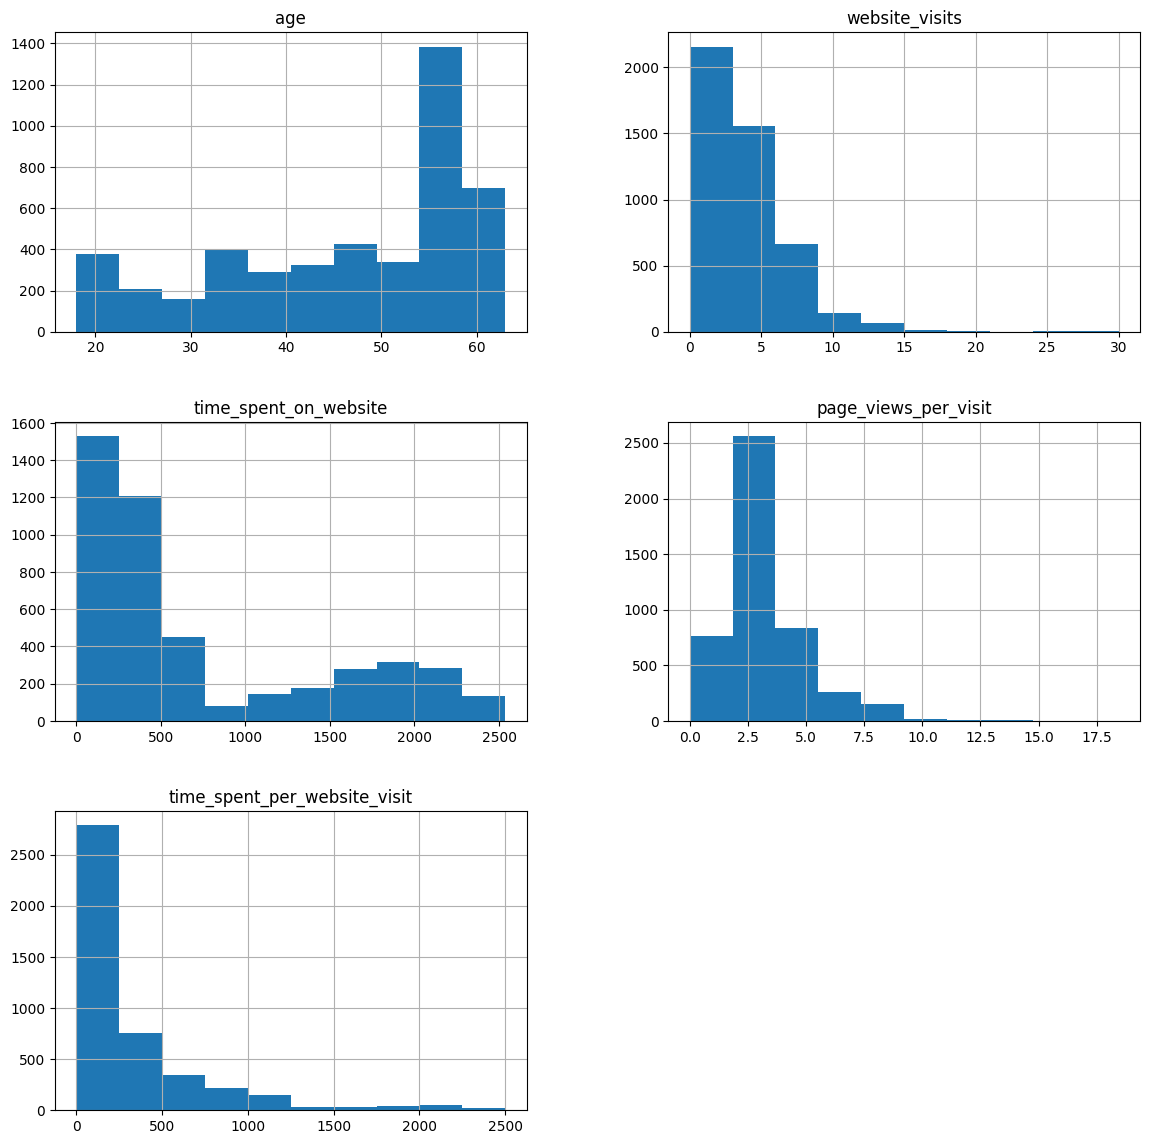

In [11]:
# Creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

Observations
*   The distribution of age is skewed higher (more so than I anticipated). While it appears that a majority of employees are in their 20s and 30s, the 50+ group pushes that mean higher.
*   Website visits are skewed to the left meaning that a small proporition of leads are interacting with the site. This could be due to the age factor, and comfortability with "old media." The mean sits around 3 visits.
*   Time-spend-on-website is bi-modal showing that there are two classes of customers. While time sits somewhere in the 700s, this distribution shows that there are potentially two different groups that are in the broader leads group.
*   Lastly, page views per visit indicates a slightly skewed normal distribution.

In [12]:
# Printing the % sub categories of each category
# print(df['first_interaction'].value_counts(normalize=True))
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******

**Observations**
*   Most leads are in professional positions currently, indicating that these are folks interested in making shifts in their career through continued learning
*   Roughly half the population uses the website vs. the mobile app as the first interaction
*   Very few leads have their profile activity as low. About half have a high-degree of completeness and half have medium. The low could be an easy indication of who is truly interested in the educational service.
*   Healthy distribution of last_activity with website activity the lowest at ~24% and email at 49%
*   Newspaper is not a popular source of advertising, and magazines are even less popular
*   Digital media does not appear to be very high either - all indicating that these marketing efforts are not reaching the vast majority of leads that come into the funnel.
*   Exposure of the service in educational channels looks to be the most common among all the flags
*   Most leads are not coming in as referrals - would be interesting to compare to industry standard to understand whether this is abnormally low.

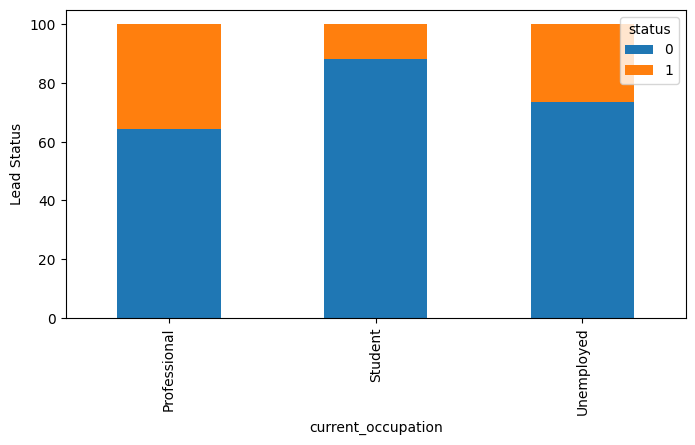

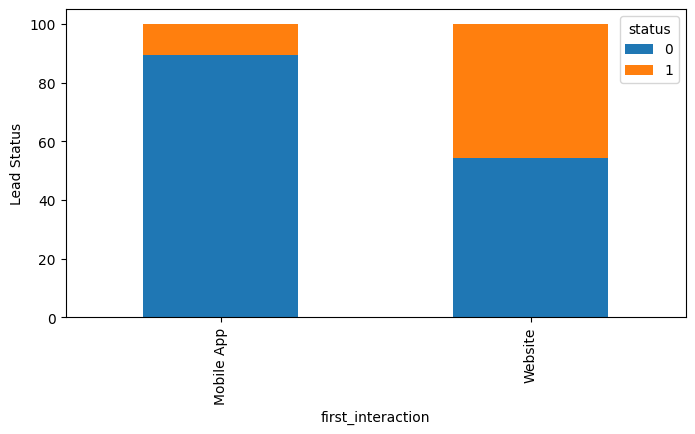

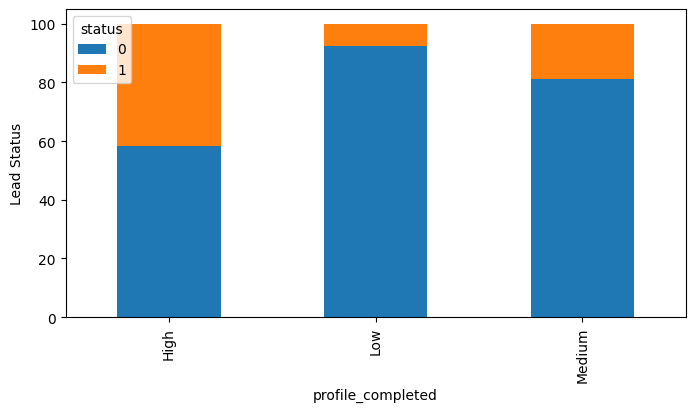

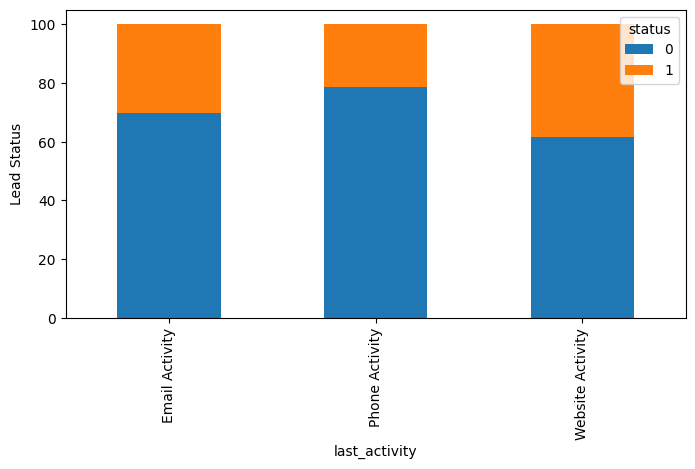

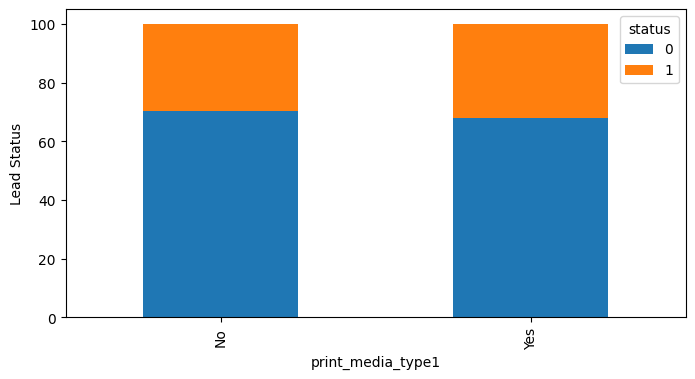

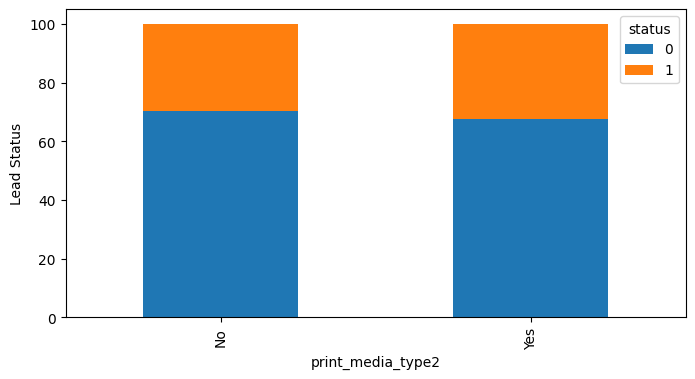

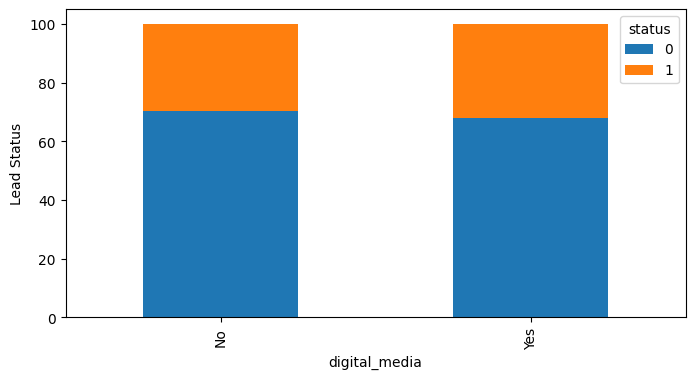

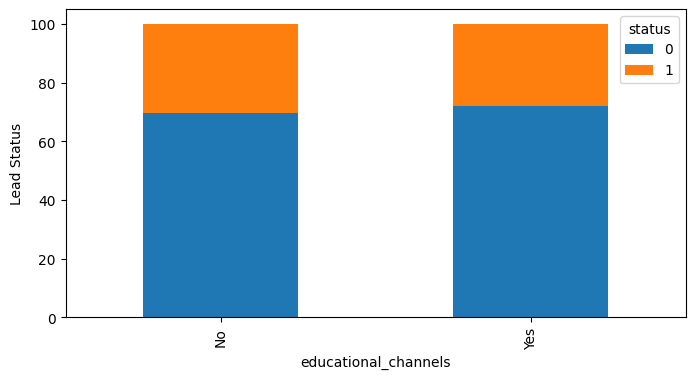

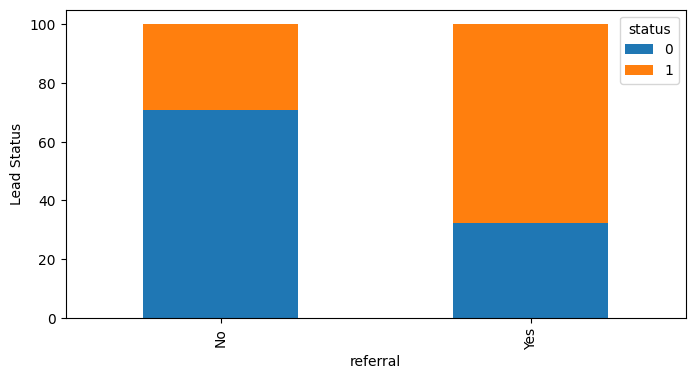

In [13]:
# Bivariate histograms for categorical variables.

for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Lead Status')

**Observations**
*   Performing a bivariate analysis shows that working professionals are the most likely to convert, followed by unemployed individuals. Leads identifying as students are the least converted.
*   Those interacting through the website first have a much higher conversion rate when compared to those who use the mobile app first.
*   Those with high-degree of completeness in their profiles convert at higher proportions than medium, who convert at higher proportions than low - this was expected and can be taken as a level of interest
*   Neither of the print media flags, nor the digital flag, nor the edu channel flag show much of a difference in the conversion rate between those who were exposed to the ad and those that were not.
*   While there are not very many referrals included in the observations, of those that were referred, it appears that they have a very high liklihood of converting.

**Check the mean of the numerical variables when grouped by status.**

In [14]:
# Mean of numerical variables grouped by attrition
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit,time_spent_per_website_visit
status,,,,,
0,45.153014,3.578980,577.420711,3.025732,249.342674
1,48.663762,3.538126,1068.397967,3.027050,469.250532


**Observations**

There does not appear to be a substantial difference between the age, website_visits, or page_views_per_visit when dividing out by the status of the lead. Time_spent_on_website, however, does show a marked increase when comparing those that did convert to those that did not.

**Let's look at a correlation matrix to understand similarities in the predictor variables.**

<Axes: >

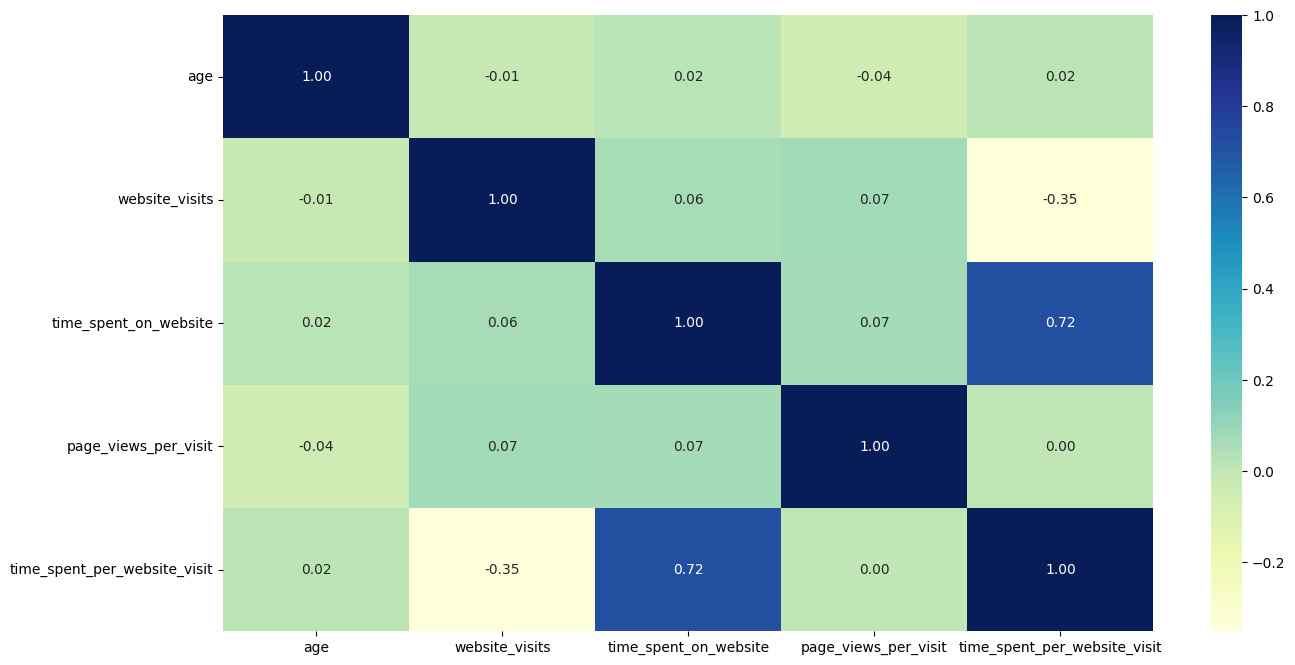

In [15]:
# Heatmap assessing correlations between numeric variables - nothing too concerning here given that we are taking "time_spent_per_website" visit out
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations**

No substantial correlation between the variables. The only correlation is between the variable that was created to capture time_spent_on_website and website_visits.

### Circling back to the questions that we are keeping in mind

1. Those that identify as working professionals have a much higher liklihood of converting, while students have the lowest proportion of conversions. There are a few inferences we can make off of this:

   a.  Professionals know what educational programs they are looking for and are more intentional with their interactions - unemployed can be thought of in a similar light.
   
   b.  Students are in learning environments already, and their next transition might not be to an additional learning opportunity, but instead the workforce.

2. The first channel appears to have a level of an impact on the conversion of customers. The website appears to convert at a notably higher rate than the mobile app. Without knowing the specifics behind the construction of the website and the mobile app, it is tough to draw a much more specific inference here, but once could infer that there is a level of personability with the website that the mobile app lacks.

3. While there are many similarities between the interactions with the prospects, it appears that website interaction is the highest conversion. This is only judging from the last interaction that the company had with the prospects, and it would be interesting to understand the activity from the past 30 days as well (if possible). Even something like "number of phone interactions", "number of website interactions", etc. in the last 30 days could shed some light.

4. While no ad is particularly successful it appears, it seems that the eductional ads in forums might be the most effective. Newspaper and magazine are not seen by ~90% of the population, while digital media ads are not see by a high proportion of customers as well. Referrals seem to be the best method of advertisement, and even though they represent a small sliver of the population, the conversion is substantially higher in those that were referred.

5. Level of completeness of the profile has a substantial impact on whether leads convert. While there remains a small amount of difference between high and medium, low completeness generally looks to indicate that the lead will not convert.

## Building a Decision Tree model

In [16]:
print(cat_cols)

['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']


In [17]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,time_spent_per_website_visit
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1,234.142857
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0,41.500000
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0,110.000000
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1,116.000000
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0,150.000000


In [18]:
# Creating list of dummy columns
to_get_dummies_for = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

# Mapping overtime and attrition
dict_print1 = {'Yes': 1, 'No':0}
dict_print2 = {'Yes': 1, 'No':0}
dict_digit = {'Yes': 1, 'No':0}
dict_edu = {'Yes': 1, 'No':0}
dict_refer = {'Yes': 1, 'No':0}

df['print_media_type1'] = df.print_media_type1.map(dict_print1)
df['print_media_type2'] = df.print_media_type2.map(dict_print2)
df['digital_media'] = df.digital_media.map(dict_digit)
df['educational_channels'] = df.educational_channels.map(dict_edu)
df['referral'] = df.referral.map(dict_refer)

In [19]:
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,time_spent_per_website_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,1,234.142857,0,1,1,0,0,0,1
1,56,2,83,0.320,0,0,0,1,0,0,41.500000,0,0,0,0,1,0,1
2,52,3,330,0.074,0,0,1,0,0,0,110.000000,0,0,1,0,1,0,1
3,53,4,464,2.057,0,0,0,0,0,1,116.000000,0,1,1,0,0,0,1
4,23,4,600,16.914,0,0,0,0,0,0,150.000000,1,0,1,0,0,0,0


**Separate out the target variable from the predictor variables.**

In [20]:
# Assign Y and X and remove appropriate columns from predictor dataset
Y=df.status
X=df.drop(columns=['status', 'time_spent_per_website_visit'])

Following the same convention as the examples, we want to split the data into **70/30 training/test**.

In [21]:
# define training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

**Scale the data**

In [22]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

The next step, if we were evaluating multiple models, would be to define our evaluation criterion. Seeing as we are focusing on Decision Trees and Random Forests only, we will define the same criterion that we would evaluate these models on in the examples.

In [23]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Convert', 'Convert'], yticklabels=['Not Convert', 'Convert'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [24]:
# Figure out what the allocation between 1 and 0 is within 'status'
print(df.status.value_counts(normalize=True))

0    0.701431
1    0.298569
Name: status, dtype: float64


In [25]:
# Define a decision tree classifer
dt = DecisionTreeClassifier(class_weight= {0: 0.701, 1: 0.299}, random_state = 1, criterion='entropy')

In [26]:
X_train.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
389,57,1,582,2.197,0,0,0,1,0,0,0,0,0,0,0,0
1162,35,2,1937,5.111,0,0,1,0,0,0,1,1,0,1,0,0
1057,53,5,1554,2.123,0,0,0,1,0,0,1,1,0,1,0,0
436,52,7,15,4.382,0,0,0,0,0,0,0,1,0,0,0,0
946,57,0,0,0.000,1,0,0,0,0,0,0,1,0,0,0,0


In [27]:
# Fit the decision tree classifer
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.701, 1: 0.299}, criterion='entropy',
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



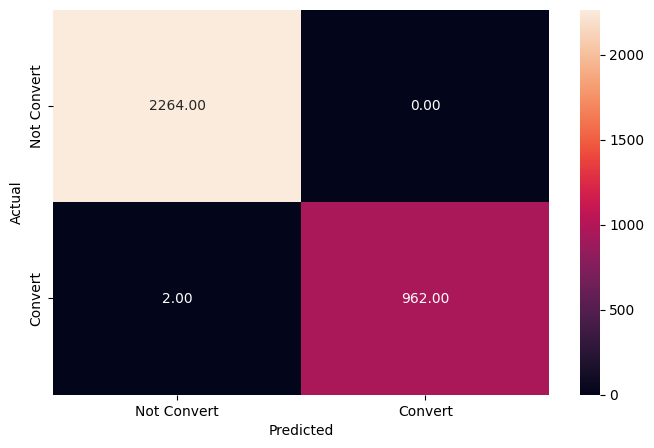

In [28]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

The model does less than ideal with the test dataset compared to the training dataset. This is indicative of overfitting and will likely need to prune the tree to get a more generalized model to apply to the test data.

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       971
           1       0.65      0.67      0.66       413

    accuracy                           0.79      1384
   macro avg       0.75      0.76      0.75      1384
weighted avg       0.79      0.79      0.79      1384



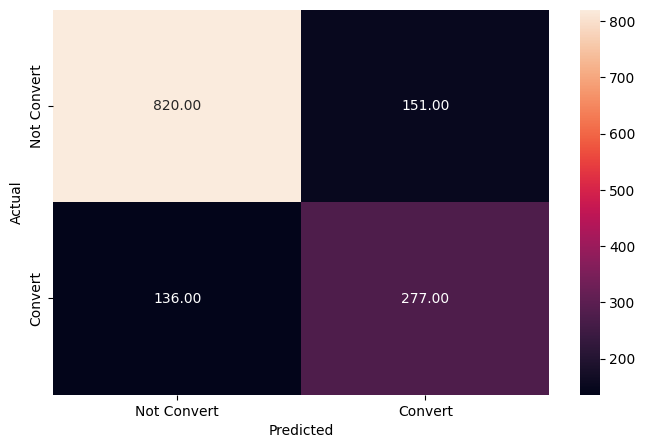

In [29]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

<Axes: xlabel='Importance', ylabel='None'>

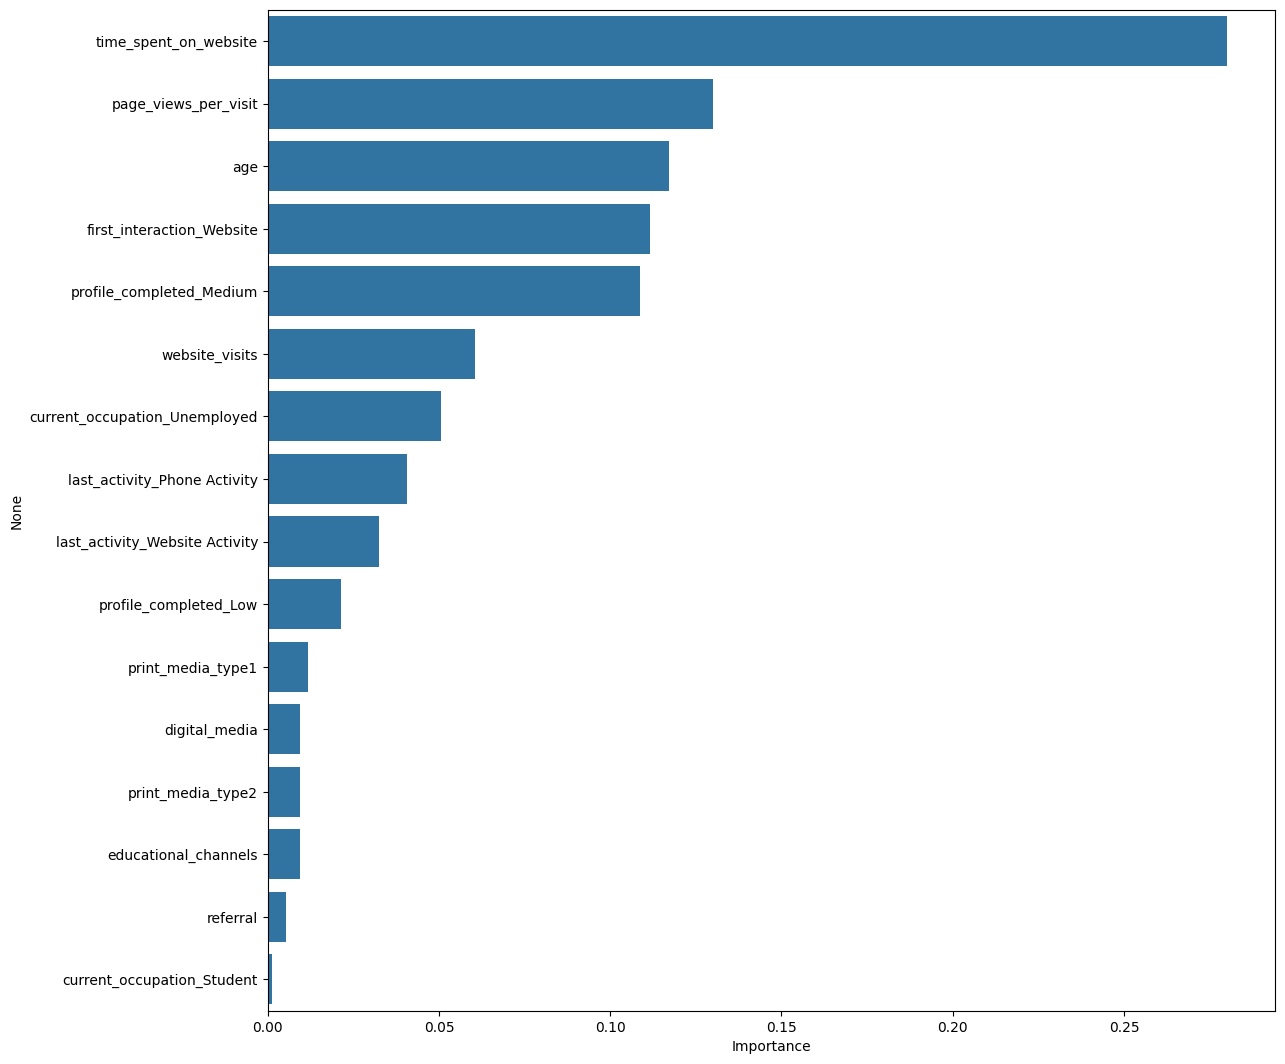

In [30]:
# Plot the feature importance
importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

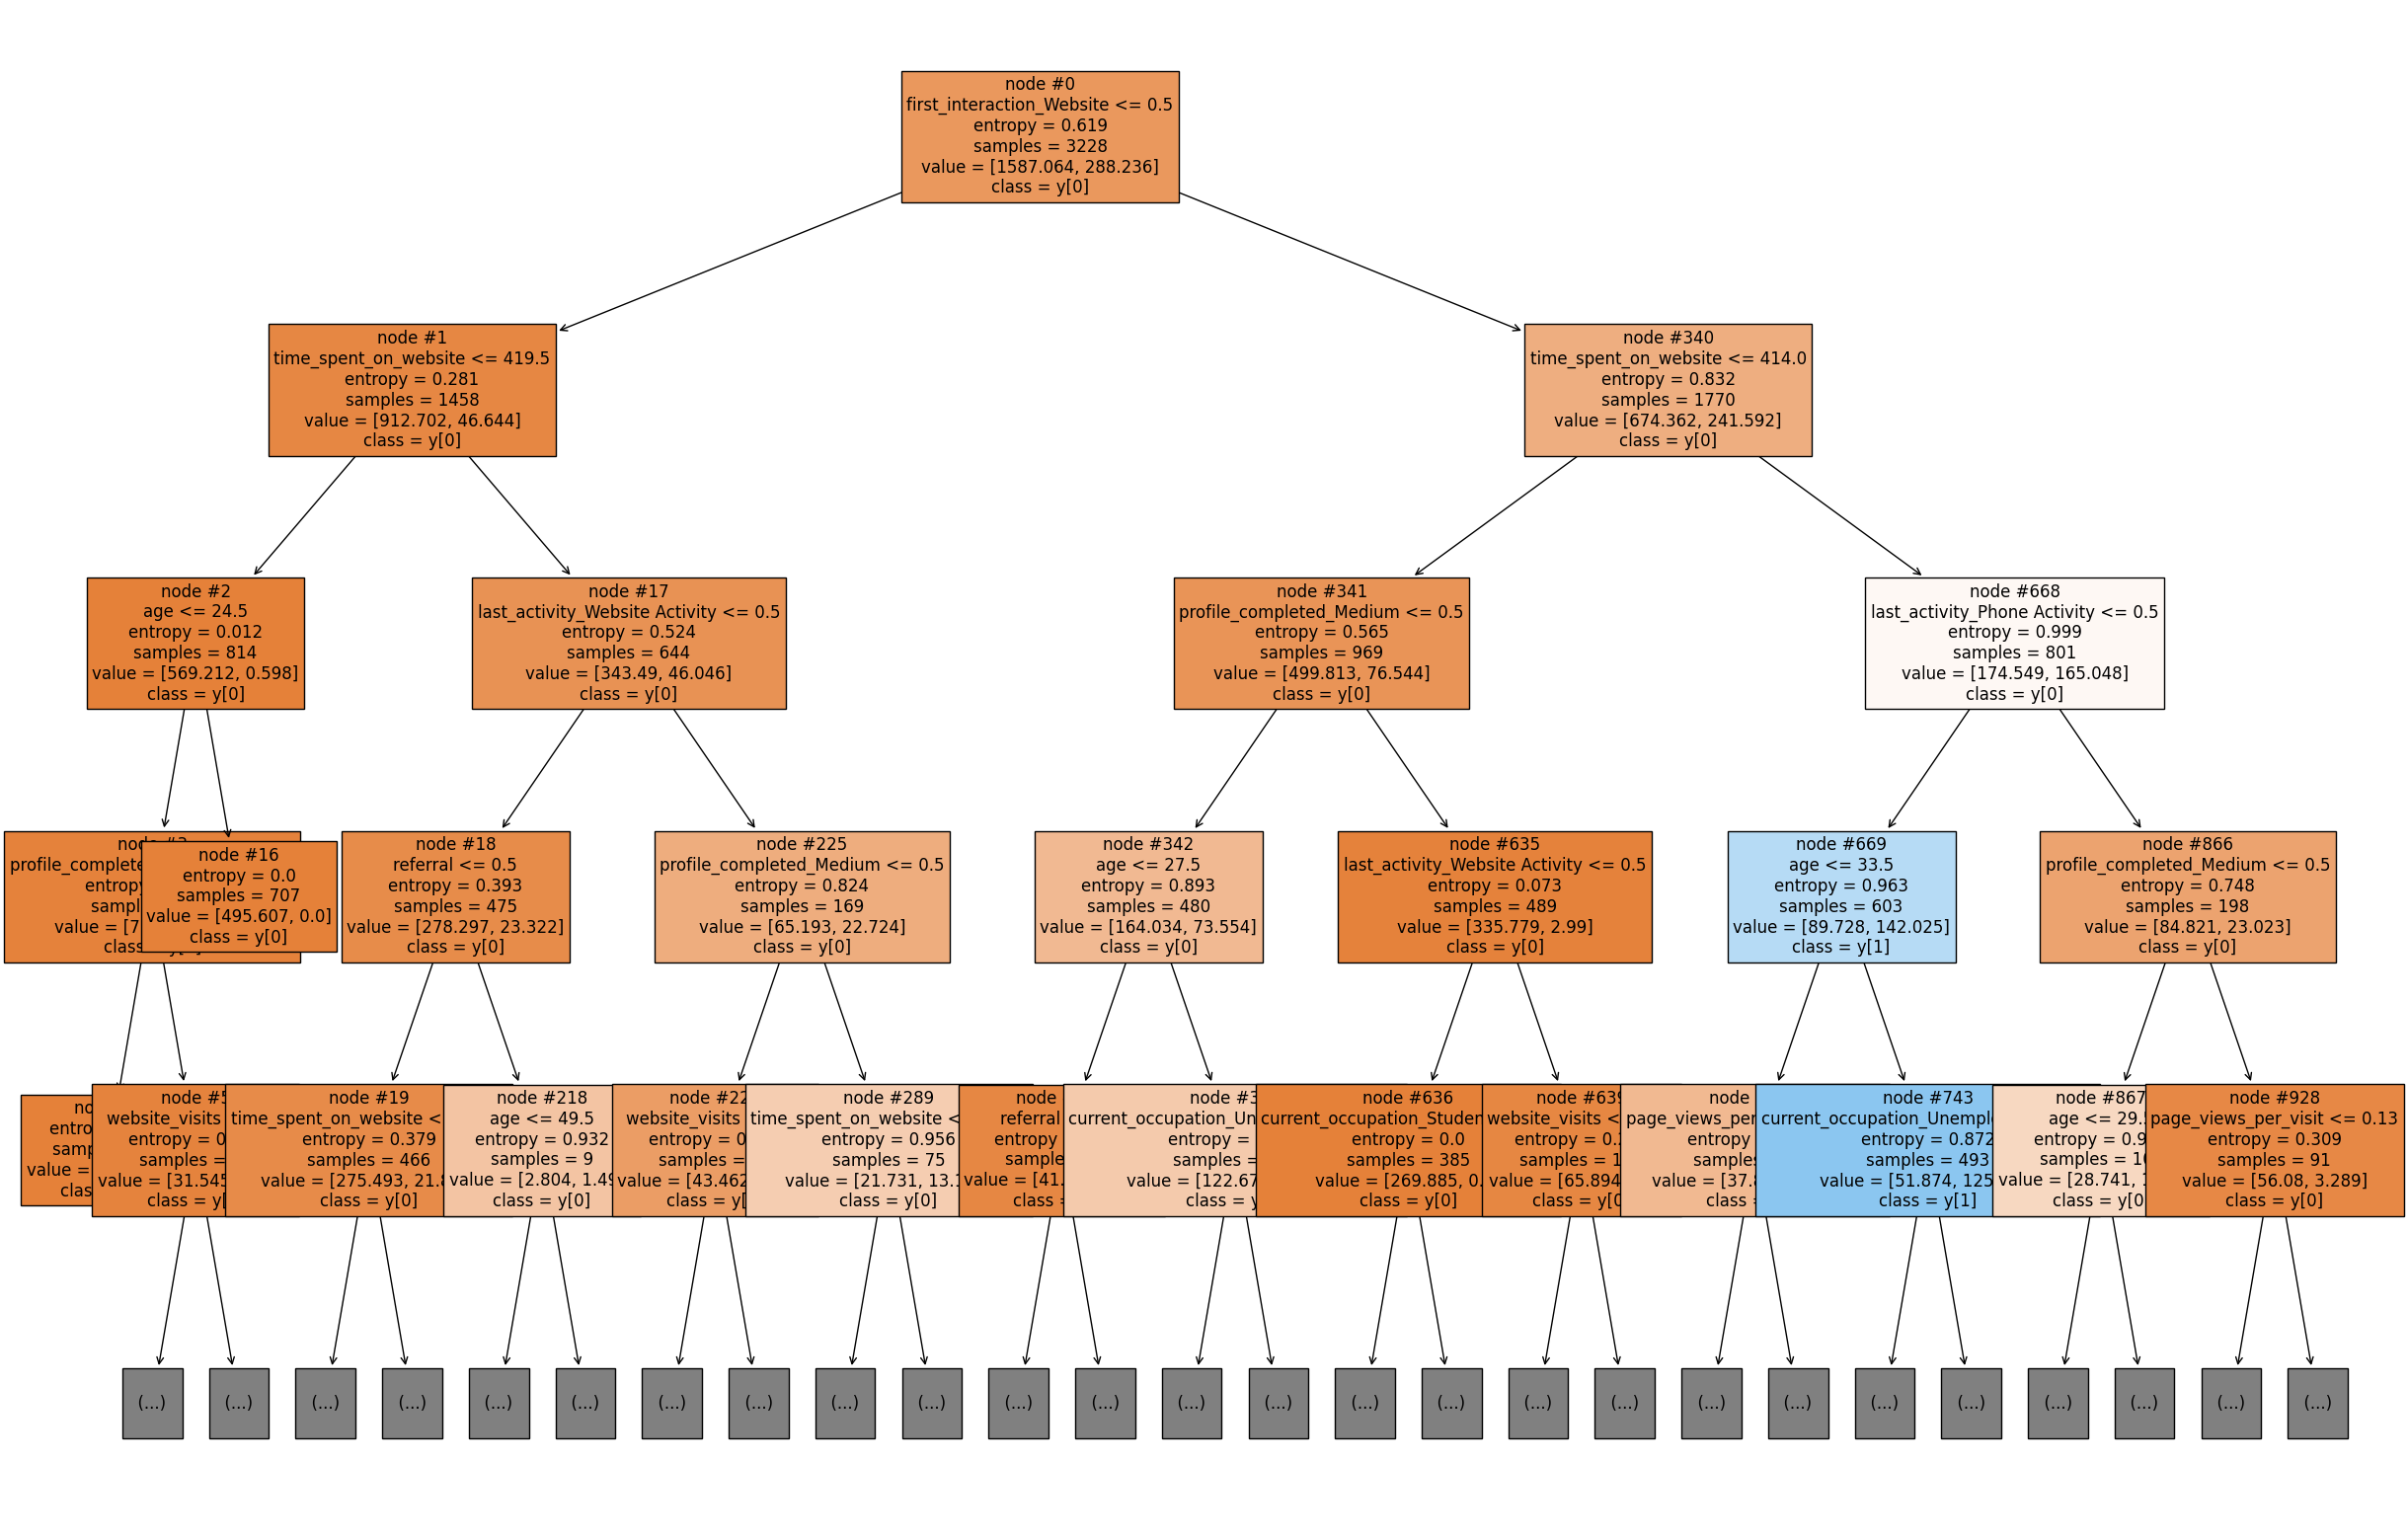

In [31]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

## Do we need to prune the tree?

We should try and prune the tree to a level in which we can achieve a better fit.

In [32]:
dt = DecisionTreeClassifier(class_weight= {0: 0.701, 1: 0.299}, random_state = 1, criterion='entropy', max_leaf_nodes=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.701, 1: 0.299}, criterion='entropy',
                       max_leaf_nodes=15, random_state=1)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2264
           1       0.96      0.38      0.54       964

    accuracy                           0.81      3228
   macro avg       0.87      0.68      0.71      3228
weighted avg       0.84      0.81      0.78      3228



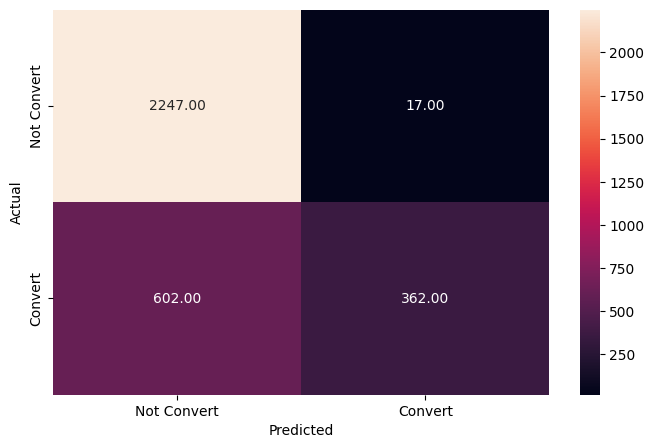

In [33]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       971
           1       0.94      0.32      0.48       413

    accuracy                           0.79      1384
   macro avg       0.86      0.66      0.68      1384
weighted avg       0.82      0.79      0.75      1384



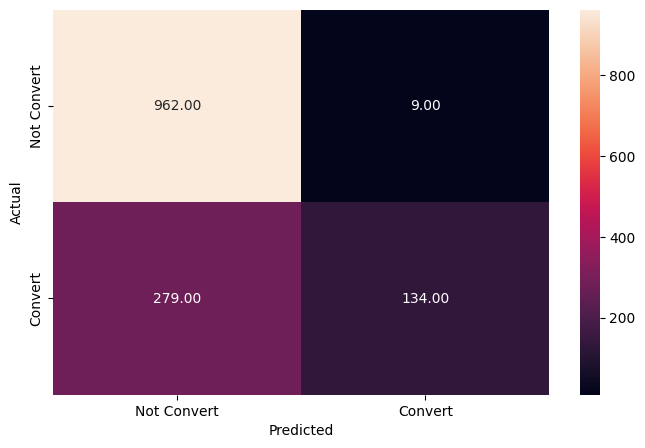

In [34]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

<Axes: xlabel='Importance', ylabel='None'>

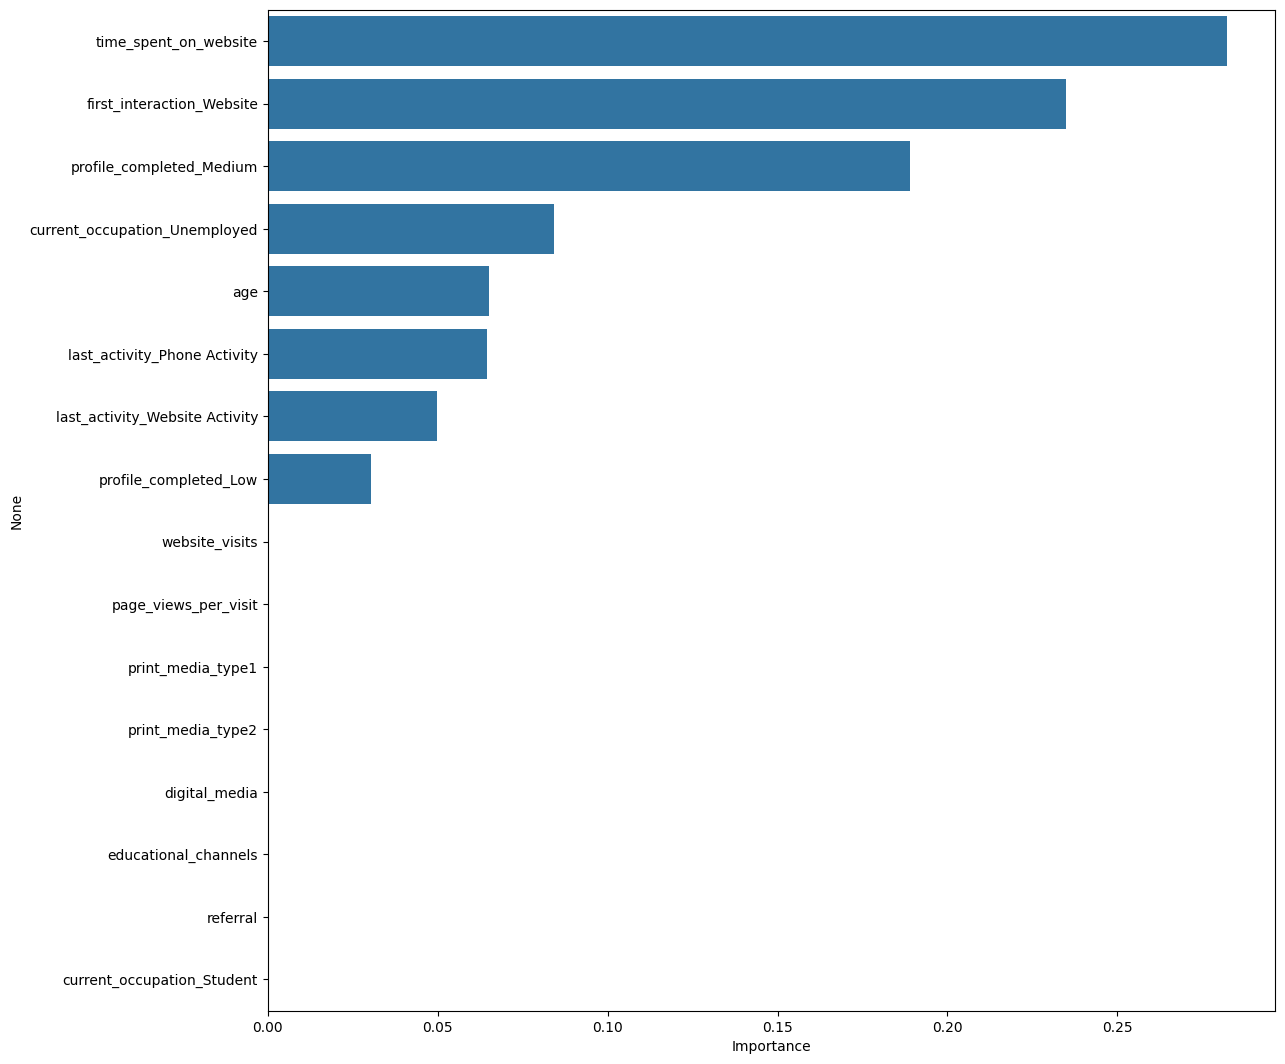

In [35]:
# Plot the feature importance

importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Results**

By pruning the tree and defining a max leaf node, we can look to bring the training and test datasets within a reasonable degree of difference with respect to it accuracy, precision and recall.

This does alter the variables that end up being considered important to the overall model, but does result in a more robust model to use with data not seen in the training set.

## Building a Random Forest model

Next, using the same dataset, we will compare the results to those of a random forest - a bagging algorithm where the base model is decision trees.

In [36]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight= {0: 0.701, 1: 0.299}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.701, 1: 0.299}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



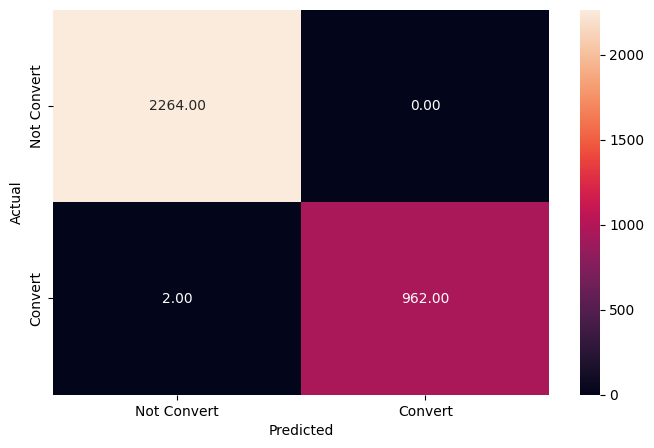

In [37]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.77      0.73      0.75       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



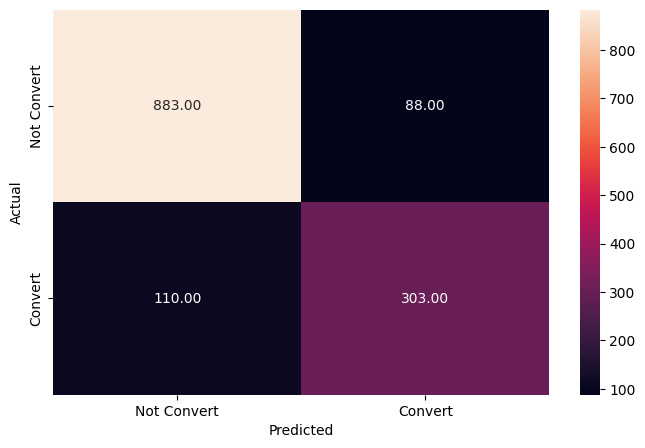

In [38]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

The random forest model is also overfitting the data as we see a large discrepancy between the precision and recall within the training data vs. the test data. What we should do next is attempt to perform a Grid Search on a Decision Tree, take the DT that is output and recreate the Random Forecast using the same specifications. This will ideally allow us to understand whether there is an improvement in the performance between the DT and RF.

## Do we need to prune the tree?

Yes we should perform a grid search with the DT function to help us prune the tree.

In [39]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [40]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_features='auto',
                       min_samples_leaf=3, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2264
           1       0.80      0.99      0.88       964

    accuracy                           0.92      3228
   macro avg       0.90      0.94      0.91      3228
weighted avg       0.94      0.92      0.92      3228



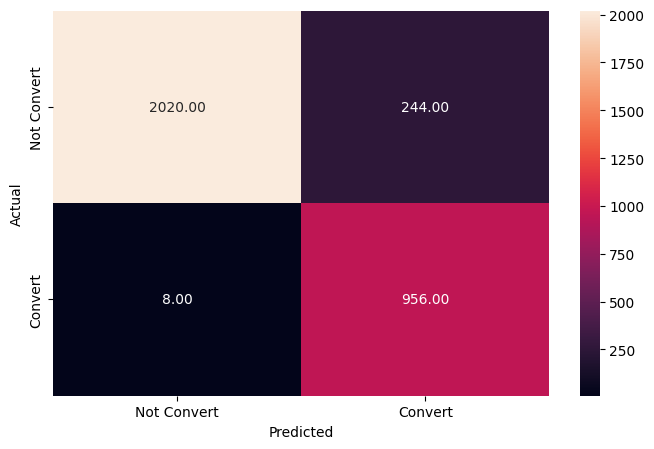

In [41]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       971
           1       0.69      0.83      0.75       413

    accuracy                           0.84      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.84      0.84      1384



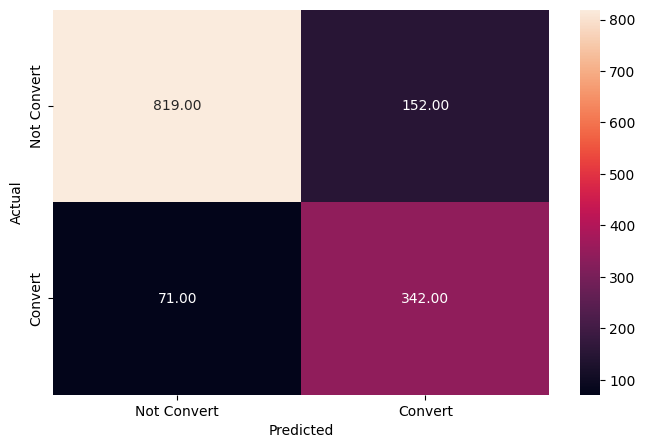

In [42]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

<Axes: xlabel='Importance', ylabel='None'>

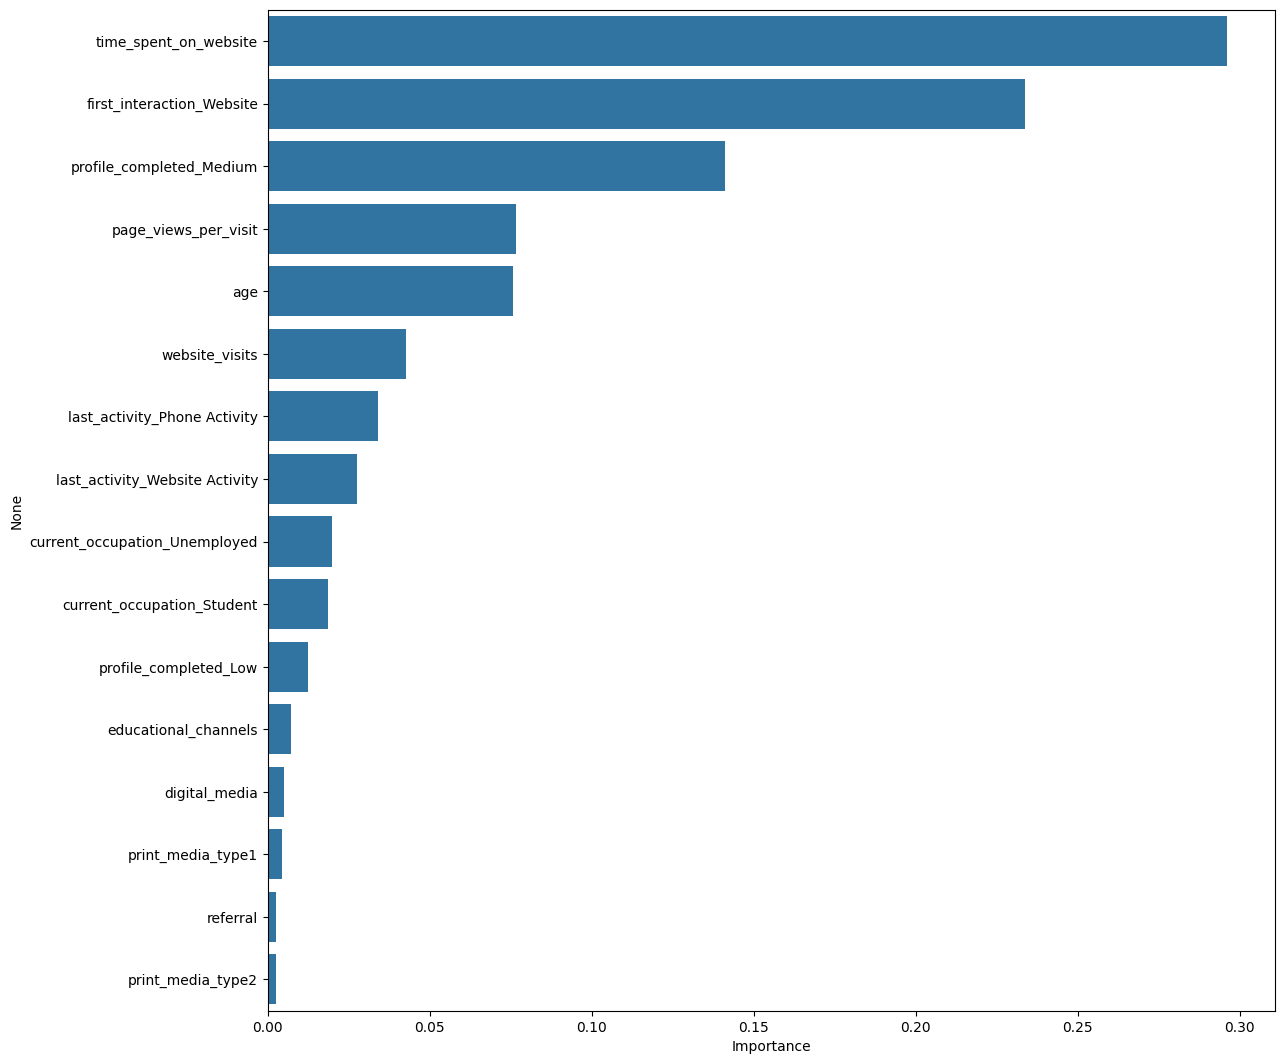

In [43]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

## Actionable Insights and Recommendations

At a time when learning has become increasingly more accessible through advancements in technology, it has become more and more important for organizations to make their appeal effectively to potential leads. Data will only become increasingly crucial in this endeavor.

From what we can see at this point, there are several takeaways that we can make through the data that ExtraaLearn has at its disposal:
*   ***Media advertisements*** are increasingly more difficult to use and should be scrutinized heavily from an ROI point-of-view. While three different advertisement flags were included in this dataset, these were not seen by the vast majority of the observations.
*   ***Time Spent on Website*** is the highest indicator of success among leads. The longer a lead spends on the website, the more likely they are to convert. This will be discussed in more length later in the recommendations.
*   ***First interaction*** with ExtraaLearn is the most important interaction. This drove the highest conversions among those in the population. Over 40% of those that had a first interaction with the website converted as compared to the mobile app which only yielded about 10% conversions.
*   ***Profile Completeness*** shows to be an indicator of success. While Medium specifically here is called out as one of the highest feature importances, we do see that high-level of completeness in our EDA results in a higher proportion of converted leads. This goes without saying that the more a candidate is willing to put in on their profile, the level to which they are engaged increases, and their liklihood to convert goes up.

**Overall Recommendation**

Based on the observations noted above, it is important to establish a clear website, with clear messaging for potential leads. We see that those leads that are converting are more likely to spend be more engaged as judged through the completeness of their profile and spend higher amounts of time on the website itself. This is the best form of advertisement that ExtraaLearn has at its disposal.

Conversely, all media (especially print media) should be evaluated through a heavily scrutinized process to understand the reach and whether it is providing the return that justifies its spend. The website is clearly working to attact leads and by redistributing these funds to potentially use on the website and enhance further could see an additional level of ROI.